Epoch 1/100
1257/1257 [==============================] - 11s 8ms/step - loss: 0.5065 - accuracy: 0.8212 - val_loss: 0.4134 - val_accuracy: 0.8506

Epoch 00001: val_loss improved from inf to 0.41336, saving model to ./model/1.000000-0.4134.hdf5
Epoch 2/100
1257/1257 [==============================] - 10s 8ms/step - loss: 0.3816 - accuracy: 0.8615 - val_loss: 0.3610 - val_accuracy: 0.8684

Epoch 00002: val_loss improved from 0.41336 to 0.36101, saving model to ./model/2.000000-0.3610.hdf5
Epoch 3/100
1257/1257 [==============================] - 10s 8ms/step - loss: 0.3420 - accuracy: 0.8749 - val_loss: 0.3441 - val_accuracy: 0.8732

Epoch 00003: val_loss improved from 0.36101 to 0.34406, saving model to ./model/3.000000-0.3441.hdf5
Epoch 4/100
1257/1257 [==============================] - 10s 8ms/step - loss: 0.3118 - accuracy: 0.8852 - val_loss: 0.3406 - val_accuracy: 0.8748

Epoch 00004: val_loss improved from 0.34406 to 0.34057, saving model to ./model/4.000000-0.3406.hdf5
Epoch 5/100


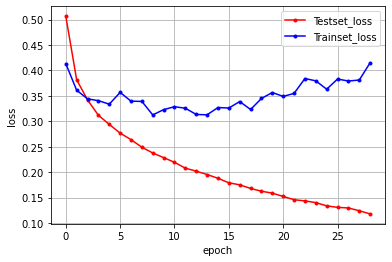

313/313 [==============================] - 2s 5ms/step - loss: 0.4418 - accuracy: 0.8824

Accuracy : 0.8824


In [57]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.datasets import mnist


fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images , train_class_labels) , (test_images , test_class_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(train_images.shape[0] , 784).astype("float64") / 255
test_images = test_images.reshape(test_images.shape[0] , 784).astype("float64") / 255

train_labels = tf.keras.utils.to_categorical(train_class_labels , 10)
test_labels = tf.keras.utils.to_categorical(test_class_labels , 10)

seed = 0 
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(512 , input_dim = 784 , activation = "relu"))
model.add(Dense(10 , activation = "softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
early = EarlyStopping(monitor = "val_loss" , patience = 20)
modelpath = "./model/{epoch:02f}-{val_loss:.4f}.hdf5"
check = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)
history = model.fit(train_images , train_labels , validation_split = 0.33 ,epochs = 100 , verbose = 1 , callbacks = [check , early])

vloss = history.history["val_loss"]
loss = history.history["loss"]

x_len = np.arange(len(loss))
plt.plot(x_len , loss , marker = "." , c = "red" , label = "Testset_loss")
plt.plot(x_len , vloss , marker = "." , c = "blue" , label = "Trainset_loss")

plt.legend(loc = "upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

print("\nAccuracy : {:.4f}".format(model.evaluate(test_images , test_labels)[1]))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


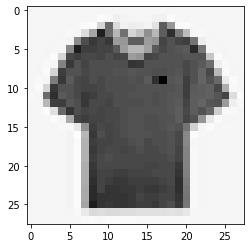

class =  [8]


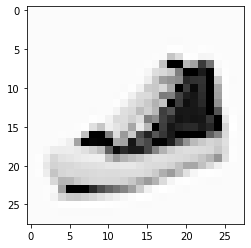

class =  [9]


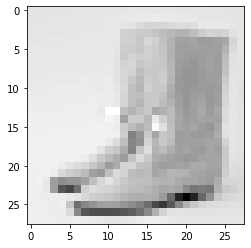

class =  [8]


In [56]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = load_model("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/model/9.000000-0.3072.hdf5")
model.summary()

n = 3
test_pic = [[0]  * n for _ in range(n)]

test_pic[0] = cv2.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/test.jpg" , cv2.IMREAD_GRAYSCALE)
test_pic[1] = cv2.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/shouse.jpg", cv2.IMREAD_GRAYSCALE)
test_pic[2] = cv2.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/부츠.jpg", cv2.IMREAD_GRAYSCALE)

for i in range(3):
#     test_pic[i] = cv2.cvtColor(test_pic[i] , cv2.COLOR_BGR2GRAY)
    test_pic[i] = 255 - test_pic[i]
    plt.imshow(test_pic[i] , cmap = "Greys");
    plt.show()
    test_pic[i] = test_pic[i].reshape(1 , 784).astype("float64") / 255
    print("class = " , model.predict_classes(test_pic[i]))

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


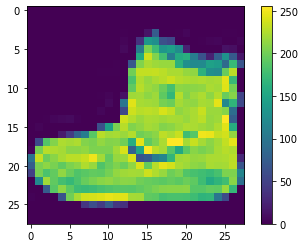

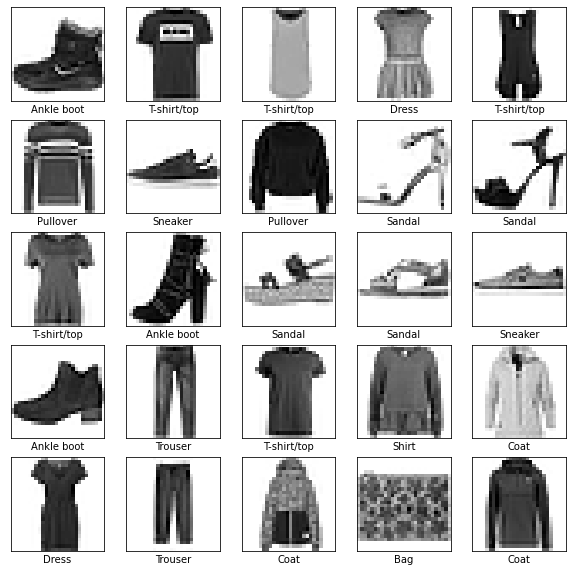

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5002 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3767 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3372 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3111 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2964 - accuracy: 0.8905
313/313 - 1s - loss: 0.3632 - accuracy: 0.8708

테스트 정확도 :  0.8708000183105469
[6.7453595e-07 9.2796109e-09 2.5778317e-07 1.0271544e-07 1.6016050e-07
 2.1797619e-03 1.1244419e-07 2.1115782e-02 1.4106866e-05 9.7668904e-01]
9


In [69]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]

print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize = (10 , 10))
for i in range(25):
    plt.subplot(5 , 5 , i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

model = Sequential()
model.add(Flatten(input_shape = (28 , 28)))
model.add(Dense(128 , activation = "relu"))
model.add(Dense(10 , activation = "softmax"))

model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])
model.fit(train_images , train_labels , epochs = 5)

test_loss , test_acc = model.evaluate(test_images , test_labels , verbose = 2)
print("\n테스트 정확도 : " , test_acc)
predictions = model.predict(test_images)
print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])

In [74]:
def plot_image(i , predictions_array , true_label , img):
    predictions_array , true_label , img = predictions_array[i] , true_label[i] , img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img , cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
   
    plt.xlabel("{} {:2.0f} % ({})".format(class_names[predicted_label] , 
                                          100 * np.max(predictions_array),
                                          class_names[true_label]),
                                          color = color)
        
def plot_value_array(i , predictions_array , true_label):
    predictions_array  , true_label = predictions_array[i] , true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10) , predictions_array , color = "#777777")
    plt.ylim([0 , 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

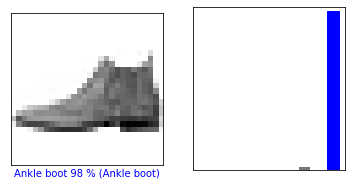

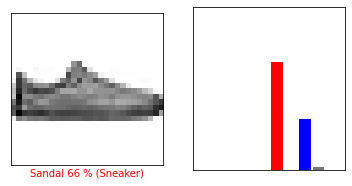

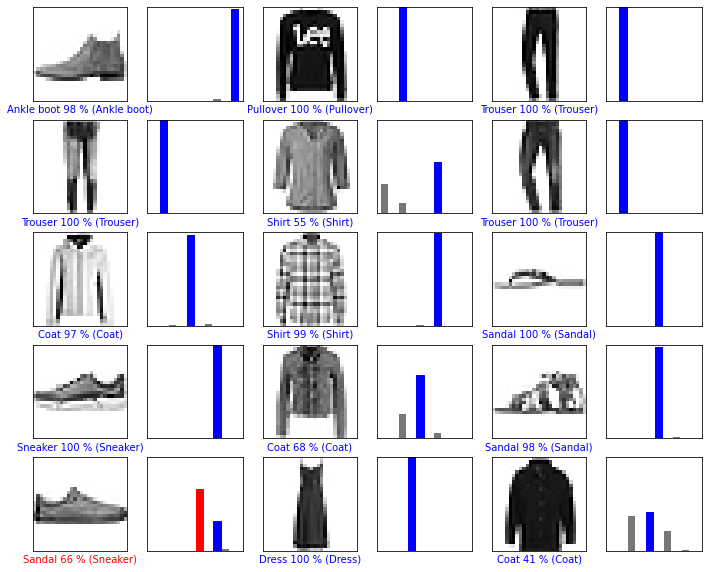

In [75]:
i = 0
plt.figure(figsize = (6 , 3))
plt.subplot(1, 2, 1)

plot_image(i , predictions , test_labels , test_images)
plt.subplot(1, 2, 2)

plot_value_array(i , predictions ,test_labels)
plt.show()

i = 12
plt.figure(figsize = (6 , 3))
plt.subplot(1 , 2 , 1)
plot_image(i , predictions , test_labels , test_images)
plt.subplot(1, 2, 2)
plot_value_array(i , predictions ,test_labels)
plt.show()

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols , 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows , 2 * num_cols , 2 * i + 1)
    plot_image(i , predictions , test_labels , test_images)
    plt.subplot(num_rows , 2 * num_cols , 2 * i + 2)
    plot_value_array(i , predictions , test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[6.7453504e-07 9.2796109e-09 2.5778317e-07 1.0271530e-07 1.6016050e-07
  2.1797605e-03 1.1244419e-07 2.1115774e-02 1.4106866e-05 9.7668904e-01]]


9

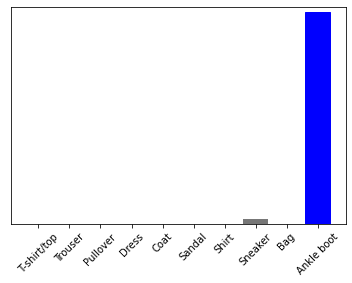

In [77]:
# 데이터 세트에서 이미지 하나선택
img = test_images[0]

print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가 , 학습이 3차원이었으므로 하나만 predict할때도 3차원으로
img = (np.expand_dims(img , 0)) # np.expand_dims(배열 , 축)을 통해 지정된 축의 차원을 확장

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0 , predictions_single , test_labels)
_= plt.xticks(range(10) , class_names , rotation = 45)

np.argmax(predictions_single[0])


Epoch 00001: val_loss improved from inf to 0.06085, saving model to ./model/01-0.0608.hdf5

Epoch 00002: val_loss improved from 0.06085 to 0.04918, saving model to ./model/02-0.0492.hdf5

Epoch 00003: val_loss improved from 0.04918 to 0.03367, saving model to ./model/03-0.0337.hdf5

Epoch 00004: val_loss improved from 0.03367 to 0.03300, saving model to ./model/04-0.0330.hdf5

Epoch 00005: val_loss improved from 0.03300 to 0.03150, saving model to ./model/05-0.0315.hdf5

Epoch 00006: val_loss improved from 0.03150 to 0.02894, saving model to ./model/06-0.0289.hdf5

Epoch 00007: val_loss did not improve from 0.02894

Epoch 00008: val_loss improved from 0.02894 to 0.02498, saving model to ./model/08-0.0250.hdf5

Epoch 00009: val_loss did not improve from 0.02498

Epoch 00010: val_loss did not improve from 0.02498

Epoch 00011: val_loss did not improve from 0.02498

Epoch 00012: val_loss did not improve from 0.02498

Epoch 00013: val_loss did not improve from 0.02498

Epoch 00014: val_lo

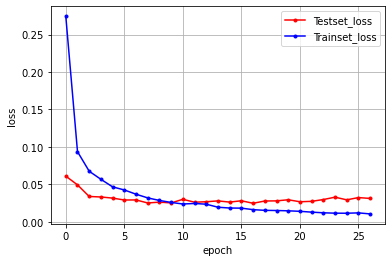

In [85]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os 
import tensorflow as tf

seed = 0 
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train , Y_train) , (X_test , Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0] ,28 , 28 ,1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0] ,28 , 28 ,1).astype("float32") / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32 , kernel_size = (3 , 3) , input_shape = (28 , 28 ,1) , activation = "relu"))
model.add(Conv2D(64 , (3, 3) ,activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10 , activation = "softmax"))
model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

Model_dir = "./model/"
if not os.path.exists(Model_dir):
    os.mkdir(Model_dir)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = "val_loss" , patience = 10)

history = model.fit(X_train , Y_train , validation_data = (X_test , Y_test) , epochs = 30 , batch_size = 200 , verbose = 0 , callbacks = [early_stopping_callback , checkpointer])

print("\n Test Accuracy : %.4f" % (model.evaluate(X_test , Y_test)[1]))

y_vloss = history.history["val_loss"]

y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len , y_vloss , marker = "." , c = "red" , label = "Testset_loss")
plt.plot(x_len , y_loss , marker = "." , c = "blue" , label = "Trainset_loss")

plt.legend(loc = "upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)             

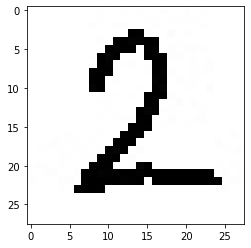

/Users/panhong/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The Answer 0 is [2]


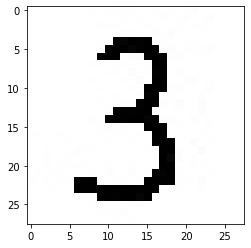

The Answer 1 is [3]


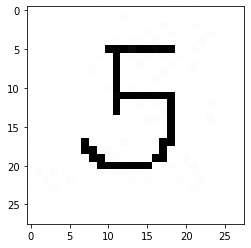

The Answer 2 is [5]


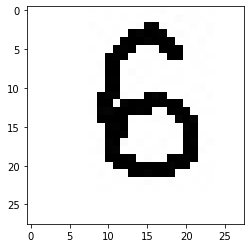

The Answer 3 is [6]


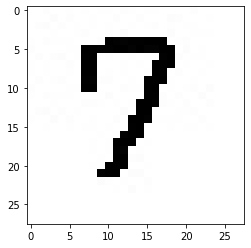

The Answer 4 is [2]


In [90]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = load_model("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/model/17-0.0246.hdf5")
model.summary()

n = 5
test_num = [[0] * 5  for _ in range(n)]
test_num[0] = plt.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/minist_test/2.jpg")
test_num[1] = plt.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/minist_test/3.jpg")
test_num[2] = plt.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/minist_test/5.jpg")
test_num[3] = plt.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/minist_test/6.jpg")
test_num[4] = plt.imread("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/image/minist_test/7.jpg")

for i in range(5):
    test_num[i] = cv2.cvtColor(test_num[i] , cv2.COLOR_BGR2GRAY)
    test_num[i] = cv2.bitwise_not(test_num[i])
    plt.imshow(test_num[i] , cmap = "Greys")
    plt.show()
    test_num[i] = test_num[i].reshape(1 ,28 ,28 , 1).astype("float64") / 255
    print("The Answer" , i , "is" , model.predict_classes(test_num[i]))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)             

<ipython-input-95-73032ac71abb>:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(wrong_result) / 4 + 1 , 4 , idx + 1)
findfont: Font family ['NanumBarunpenBold'] not found. Falling back to DejaVu Sans.


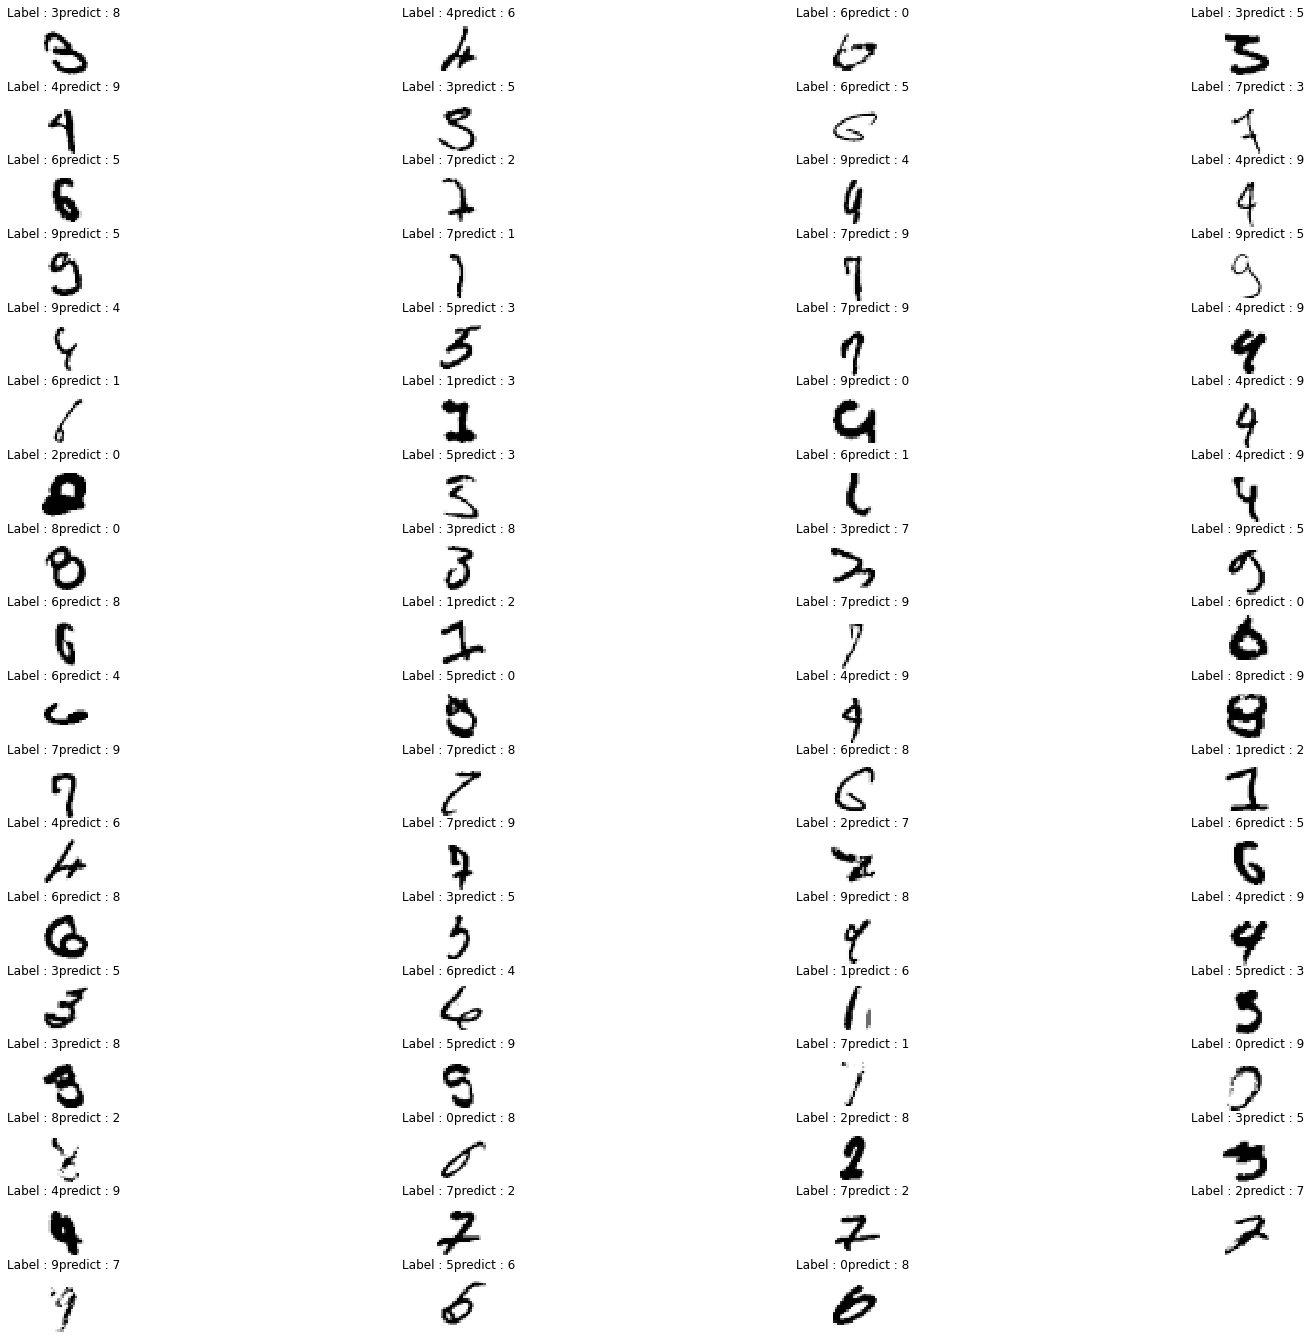

In [95]:
(X_train , Y_class_train) , (X_test , Y_class_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0] , 28 ,28 ,1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0] , 28 ,28 ,1).astype("float32") / 255

model = load_model("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/model/17-0.0246.hdf5")
model.summary()

wrong_result = []
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result , axis = 1)

for n in range(0 , len(Y_class_test)):
    if predicted_labels[n] != Y_class_test[n]:
        wrong_result.append(n)
len(wrong_result)

plt.figure(figsize = (14, 12))

for idx , n in enumerate(wrong_result):
    plt.subplot(len(wrong_result) / 4 + 1 , 4 , idx + 1)
    plt.subplots_adjust(left = 0.0 , bottom = 0.0 , right = 1.5 , top = 1.52)
    plt.imshow(X_test[n].reshape(28 ,28) , cmap = "Greys" , interpolation = "nearest")
    plt.title("Label : " + str(Y_class_test[n]) + "predict : " + str(predicted_labels[n]))
    plt.axis("off")

plt.show()

In [104]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)


fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "shirt" , "Sneakr" , "Bag" , "Ankle boot"]

train_images = train_images.reshape(train_images.shape[0] , 28 , 28 ,1).astype("float32") / 255
test_images = test_images.reshape(test_images.shape[0] , 28 , 28 , 1).astype("float32") / 255

model = Sequential()
model.add(Conv2D(32 , kernel_size = (3 , 3) , input_shape = (28 , 28 , 1) , activation = "relu"))
model.add(Conv2D(64 , (3, 3) , activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10 , activation = "softmax"))

model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model.fit(train_images , train_labels , epochs = 5)

test_loss , test_acc = model.evaluate(test_images , test_labels , verbose = 2)

print("\n테스트 정확도 : " , test_acc)
predictions = model.predict(test_images)
print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4708 - accuracy: 0.8330
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3219 - accuracy: 0.8839
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2743 - accuracy: 0.8995
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2447 - accuracy: 0.9100
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2190 - accuracy: 0.9197
313/313 - 3s - loss: 0.2319 - accuracy: 0.9167

테스트 정확도 :  0.9167000651359558
[2.2621439e-10 3.0470772e-11 9.8826076e-09 4.2432318e-11 5.2849786e-10
 2.3341967e-05 1.7470910e-09 2.5703421e-05 2.9858003e-09 9.9995089e-01]
9
